# Astropy (PHYS265)

**Name: Arpit Agarwal** 

**Date: 05/09/2025**

Below is the description of the Astropy Module focusing on its fitting and modelling codes. This was written as the final project for the class PHYS265 in the Spring 2025 semester

# Model and Fitting is Astropy

In the following notebook, I will take the data from Free-Fall of mass experiment done by me in the Lab course of PHYS275

For this data we will use the data collected by me in the experiment done to compare the data collected during slanted falling of object on air track with the formula below using Astropy LevMarLSQFitter and compare the fit with scipy curve_fit

$$ 
s = s_0+v_0t + \frac{1}{2}a_0t^2 
$$

For this I will use the fns:
1. numpy.random.poisson
2. astropy.modeling.fitting.LevMarLSQFitter
3. astropy.modeling.fitting.custom_model
4. scipy.optimize.curve_fit


Before we start lets visualize the data... 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from astropy.modeling import fitting,custom_model 
import scipy.stats as st

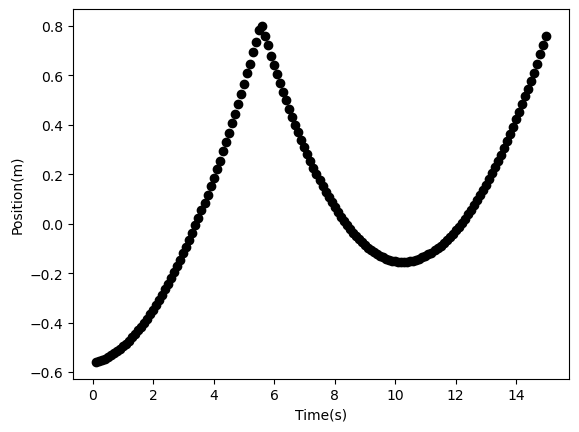

In [2]:
data = np.loadtxt("PHYS265 Data.csv",skiprows=1,delimiter=',')
Time = data[:,0] 
s_data = data[:,1]
stdev = data[:,2]
fig,ax = plt.subplots() 
ax.plot(Time,s_data,'ok',label='data'); 
ax.set_xlabel("Time(s)");
ax.set_ylabel("Position(m)");

From this data we will mask the data before the parabola to get proper results from the formula

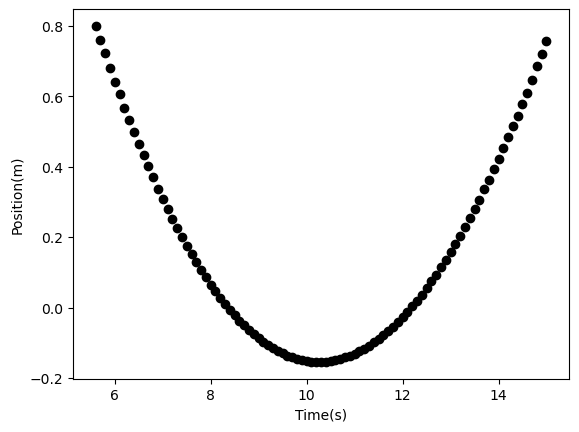

In [3]:
posdif = s_data[1:]-s_data[:-1]
dec_index = np.argmax(posdif < 0) 
s_masked = s_data[dec_index:]
t_masked = Time[dec_index:]
stdev_masked = stdev[dec_index:]
fig,ax = plt.subplots() 
ax.plot(t_masked,s_masked,'ok',label='data'); 
ax.set_xlabel("Time(s)");
ax.set_ylabel("Position(m)");

Here x_masked is the position of the masked values and t_masked is the same for time

**Fitting the data using Astropy**

We will fit the data using the custom model created below:

In [4]:
@custom_model
def s_astropy(t,s0=0.0,v0=0.0,a0=0.0):
    return s0+v0*t+(1/2)*a0*(t**2) 

In [5]:
model = s_astropy(s0=1,v0=1,a0=1)
fitter = fitting.LevMarLSQFitter()
weights = 1/(stdev_masked**2)
s_fitmodel = fitter(model,t_masked,s_masked,weights=weights)
s_fit_astropy = s_fitmodel(t_masked)
print(f"The value of fitted parameters was found as: s0={s_fitmodel.s0.value:.1f}, v0={s_fitmodel.v0.value:.1f} and a0={s_fitmodel.a0.value:.1f}")

The value of fitted parameters was found as: s0=4.3, v0=-0.9 and a0=0.1


Visualizing our data:

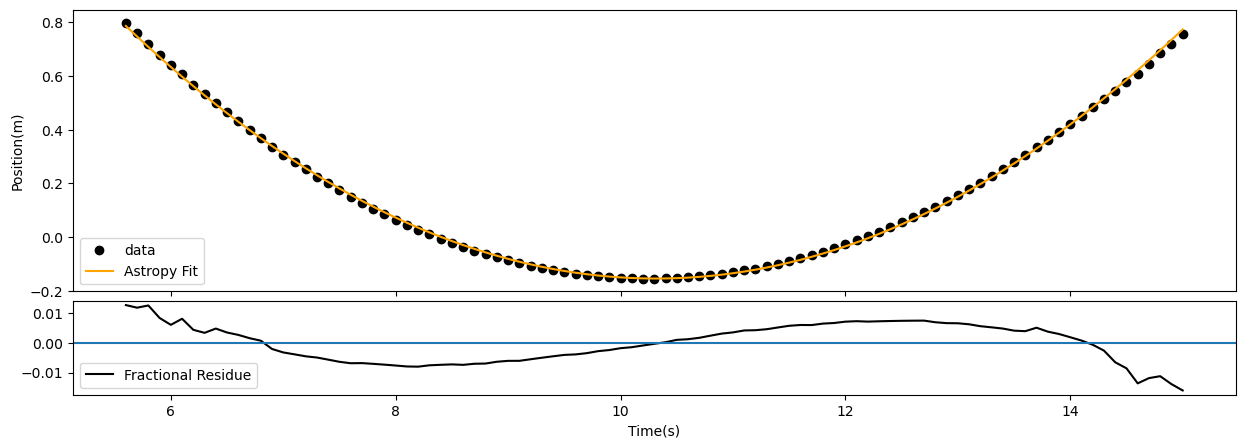

In [6]:
fig,(ax_top,ax_bot) = plt.subplots(
    2,1,sharex=True,figsize=(15,5),gridspec_kw={'height_ratios':[3,1],'hspace':0.05} 
)
ax_top.plot(t_masked,s_masked,'ok',label='data'); 
ax_top.plot(t_masked,s_fit_astropy,label='Astropy Fit',color='orange'); 

ax_top.set_ylabel("Position(m)");
ax_top.legend();
fracres = (s_masked-s_fit_astropy)
ax_bot.plot(t_masked,fracres,color='k',label='Fractional Residue')
ax_bot.axhline(0)
ax_bot.set_xlabel("Time(s)");
ax_bot.legend() 
fig.savefig('Figure 1',bbox_inches='tight')

**Fitting data using Scipy Curve_Fit**

We will fit the data using the fn defined below:

In [7]:
def s_scipy(t,s0=0.0,v0=0.0,a0=0.0):
    return s0+v0*t+(1/2)*a0*(t**2) 

In [8]:
params,pcov = curve_fit(s_scipy,t_masked,s_masked,sigma=stdev_masked)
s_fit_scipy = s_scipy(t_masked,*params) 
print(f"The value of fitted parameters was found as:s0={params[0]:.1f},v0={params[1]:.1f} and a0={params[2]:.1f}")

The value of fitted parameters was found as:s0=4.3,v0=-0.9 and a0=0.1


Visualizing our data:

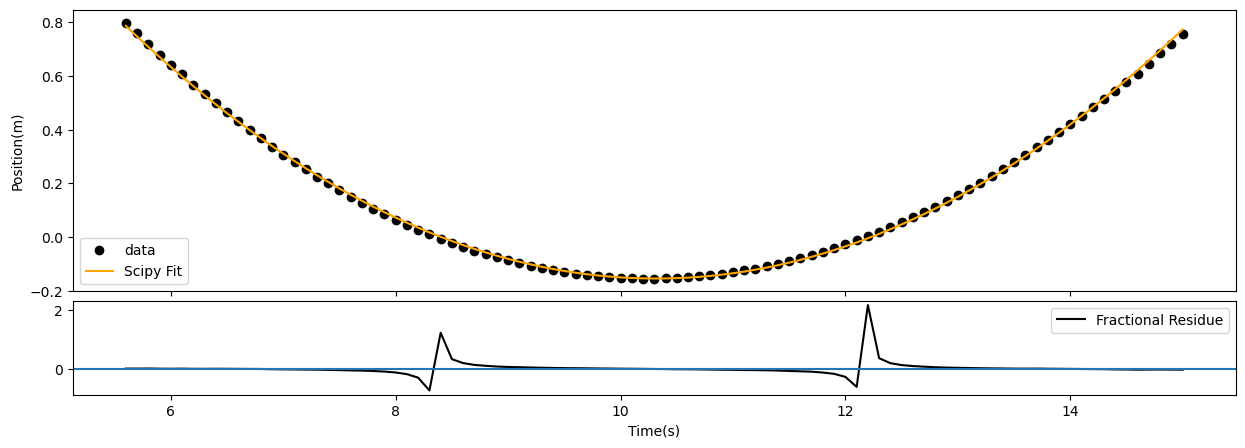

In [9]:
fig,(ax_top,ax_bot) = plt.subplots(
    2,1,sharex=True,figsize=(15,5),gridspec_kw={'height_ratios':[3,1],'hspace':0.05} 
)
ax_top.plot(t_masked,s_masked,'ok',label='data'); 
ax_top.plot(t_masked,s_fit_scipy,label='Scipy Fit',color='orange'); 

ax_top.set_ylabel("Position(m)");
ax_top.legend();
fracres = (s_masked-s_fit_scipy)/s_masked
ax_bot.plot(t_masked,fracres,color='k',label='Fractional Residue')
ax_bot.axhline(0)
ax_bot.set_xlabel("Time(s)");
ax_bot.legend() 
fig.savefig('Figure 2',bbox_inches='tight')

Now to properly compare the fits, we will find out the chi-square values of each and compare them:

In [10]:
chisq_astropy = np.sum(((s_masked-s_fit_astropy)/stdev_masked)**2) 
chisq_scipy = np.sum(((s_masked-s_fit_scipy)/stdev_masked)**2) 
ndof = len(s_masked) - 3 #Since there were 3 parameters to fit 
reducedchisq_astropy = chisq_astropy/ndof
pvalue_astropy = st.chi2.sf(chisq_astropy,ndof) 
reducedchisq_scipy = chisq_scipy/ndof
pvalue_scipy = st.chi2.sf(chisq_scipy,ndof) 

In [11]:
print(f"From this we get that the chisq value of fit by astropy is {chisq_astropy:.2f} and by scipy is {chisq_scipy:.2f}")
print(f"From this we get the value of reduced chisq done by astropy and scipy respectively as: {reducedchisq_astropy:.2f},{reducedchisq_scipy:.2f}")
print(f"And thus we get the p-value of astropy as {pvalue_astropy} and for scipy as {pvalue_scipy}")
print(f"Since both values are 0 which is due to high precision of sonic ranger,we can't depend on p-value for comparision and would have to rely on chisq only")

From this we get that the chisq value of fit by astropy is 127551.67 and by scipy is 127551.67
From this we get the value of reduced chisq done by astropy and scipy respectively as: 1386.43,1386.43
And thus we get the p-value of astropy as 0.0 and for scipy as 0.0
Since both values are 0 which is due to high precision of sonic ranger,we can't depend on p-value for comparision and would have to rely on chisq only


In [12]:
if chisq_astropy>chisq_scipy:
    print(f"By comparing the chi-sq values we can see that scipy does better fit as it has lower chi-sq value")
elif chisq_astropy<chisq_scipy:
    print(f"By comparing the chi-sq values we can see that astropy does better fit as it has lower chi-sq value")
else:
    print(f"Both have equally good capabilities of fitting")

By comparing the chi-sq values we can see that astropy does better fit as it has lower chi-sq value


Thus we can see that Astropy's LevMarLSQFitter has better fitting capabilities than Scipy and thus could be used instead of the scipy curve_fit although the difference isn't  huge and thus could be be given to rounding errors done from Scipy since the values of the parameteres and the graphs are hugely similar

It is also noticable that for such a simple fit Astropy used 5 lines of code other than model defination whereas scipy used only 2 lines of code and thus is more reliable for faster computing